## Import Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm

## Read CSV

In [2]:
df = pd.read_csv("allyear.csv")
df2 = df.corr().abs()

In [3]:
df3 = df2[df2['POP_SNAP'] > 0.7]

In [4]:
df3

,population,unemploymentRate,povertyRate,medianIncome,avgmealmon,homeless,pplweekmon,drivealone,carpooled,publicTrans,walked,meanHouseIncome,yeshealth,privatehealth,publichealth,nohealth,POP_SNAP
homeless,0.591383,0.025236,0.384512,0.266453,0.108051,1.000000,0.453408,0.449822,0.523188,0.569306,0.581056,0.064108,0.562882,0.473726,0.670776,0.684638,0.746321
walked,0.686380,0.087871,0.401652,0.164310,0.060991,0.581056,0.190965,0.438373,0.664018,0.947683,1.000000,0.001881,0.654390,0.570985,0.692385,0.876404,0.755258
publichealth,0.940448,0.146743,0.310709,0.157232,0.065868,0.670776,0.128149,0.844619,0.885444,0.652674,0.692385,0.006497,0.929147,0.858666,1.000000,0.878965,0.816768
nohealth,0.861809,0.078733,0.415315,0.193366,0.028130,0.684638,0.211323,0.684538,0.839203,0.831374,0.876404,0.007616,0.830742,0.743158,0.878965,1.000000,0.864358
POP_SNAP,0.660805,0.096361,0.674003,0.475714,0.138293,0.746321,0.443268,0.463006,0.674770,0.679789,0.755258,0.318795,0.623689,0.489266,0.816768,0.864358,1.000000


## SNAP Cutoff

In [5]:
drop1 = ['population','unemploymentRate', 'povertyRate','medianIncome', 'avgmealmon', 'pplweekmon', 'drivealone', 'carpooled', 'publicTrans','meanHouseIncome', 'yeshealth','privatehealth']
df3.drop(drop1, axis=1, inplace=True)

/Users/myra/opt/anaconda3/lib/python3.8/site-packages/pandas/core/frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [6]:
df3

,homeless,walked,publichealth,nohealth,POP_SNAP
homeless,1.000000,0.581056,0.670776,0.684638,0.746321
walked,0.581056,1.000000,0.692385,0.876404,0.755258
publichealth,0.670776,0.692385,1.000000,0.878965,0.816768
nohealth,0.684638,0.876404,0.878965,1.000000,0.864358
POP_SNAP,0.746321,0.755258,0.816768,0.864358,1.000000


## Variable Cutoff

In [7]:
upper = df3.where(np.triu(np.ones(df3.shape), k=1).astype(bool))

# Find features with correlation greater than 0.67
to_drop = [column for column in upper.columns if any(upper[column] > 0.67)]

# Drop features 
df3.drop(to_drop, axis=1, inplace=True)

/Users/myra/opt/anaconda3/lib/python3.8/site-packages/pandas/core/frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [8]:
df3

,homeless,walked
homeless,1.000000,0.581056
walked,0.581056,1.000000
publichealth,0.670776,0.692385
nohealth,0.684638,0.876404
POP_SNAP,0.746321,0.755258


In [9]:
drop3 = ['publichealth', 'nohealth', 'POP_SNAP']
df3.drop(drop3, inplace=True)

/Users/myra/opt/anaconda3/lib/python3.8/site-packages/pandas/core/frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [10]:
df3

,homeless,walked
homeless,1.000000,0.581056
walked,0.581056,1.000000


In [11]:
opvars = ['homeless','walked','POP_SNAP']
df = df[opvars]
df

,homeless,walked,POP_SNAP
0,357,5923,32072
1,271,10764,30301
2,518,1733,19123
3,603,3665,59120
4,90,2625,6712
...,...,...,...
100,38,466,9325
101,342,3684,12874
102,57,1145,4735
103,504,8130,49795


In [12]:
df

,homeless,walked,POP_SNAP
0,357,5923,32072
1,271,10764,30301
2,518,1733,19123
3,603,3665,59120
4,90,2625,6712
...,...,...,...
100,38,466,9325
101,342,3684,12874
102,57,1145,4735
103,504,8130,49795


In [13]:
df.to_csv('method1C.csv')

In [14]:
df.cov()

,homeless,walked,POP_SNAP
homeless,1.860120e+05,1.548270e+06,1.062300e+07
walked,1.548270e+06,3.816945e+07,1.539941e+08
POP_SNAP,1.062300e+07,1.539941e+08,1.089187e+09


In [15]:
df.var()

homeless    1.860120e+05
walked      3.816945e+07
POP_SNAP    1.089187e+09
dtype: float64

# Multiple Linear Regression

In [16]:
df = pd.read_csv("method1C.csv")
df.drop(columns=df.columns[0], axis=1, inplace=True)

In [17]:
df

,homeless,walked,POP_SNAP
0,357,5923,32072
1,271,10764,30301
2,518,1733,19123
3,603,3665,59120
4,90,2625,6712
...,...,...,...
100,38,466,9325
101,342,3684,12874
102,57,1145,4735
103,504,8130,49795


In [18]:
x = df.drop(['POP_SNAP'],axis=1).values
y = df['POP_SNAP'].values

In [19]:
# splitting dataset into training and test set

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3, random_state=0)

In [20]:
# training model on training set
ml = LinearRegression()
ml.fit(x_train,y_train)

LinearRegression()

In [21]:
# predict test set results
y_pred=ml.predict(x_test)
print(y_pred)

[ 11009.97351386  44292.51750798  28563.64029838  10860.59549201
  55414.15603107 129184.83549166   7386.92011528   7001.03870575
  21138.32958402  38925.17645901  40605.31864965  31488.41625944
  12507.64916673  29782.1124778   14824.48368244  13905.73273542
  54872.5852241   38204.20234002  29325.32050474 111948.29821666
  54675.88051756  14192.01916664  37257.5703458   47194.22110089
  44251.3374836   30846.67828679 120372.711558    63342.29946632
  35972.2478027    6850.25334357  35701.64445427  41486.58276789]


In [22]:
#ml.predict([[263670,4.875000,0.111,3.43]])

Text(0.5, 1.0, 'Method 1C')

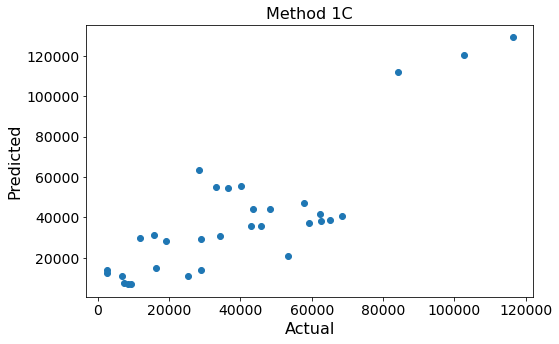

In [23]:
# scatterplot of results
plt.figure(figsize=(8,5))
plt.scatter(y_test,y_pred)
plt.xlabel('Actual', fontsize=16)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.ylabel('Predicted', fontsize=16)
plt.title('Method 1C', fontsize=16)

In [24]:
pred_y_df = pd.DataFrame({'Actual Value':y_test,'Predicted value':y_pred,'Difference':y_test-y_pred})
pred_y_df[0:20]

,Actual Value,Predicted value,Difference
0,25400,11009.973514,14390.026486
1,43657,44292.517508,-635.517508
2,19123,28563.640298,-9440.640298
3,6672,10860.595492,-4188.595492
4,40208,55414.156031,-15206.156031
5,116345,129184.835492,-12839.835492
6,7269,7386.920115,-117.920115
7,9325,7001.038706,2323.961294
8,53298,21138.329584,32159.670416
9,65177,38925.176459,26251.823541


In [25]:
# define our intput
X2 = sm.add_constant(x)

# create a OLS model
model = sm.OLS(y, X2)

# fit the data
est = model.fit()

print(est.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.713
Model:                            OLS   Adj. R-squared:                  0.708
Method:                 Least Squares   F-statistic:                     126.8
Date:                Wed, 28 Jul 2021   Prob (F-statistic):           2.19e-28
Time:                        15:32:19   Log-Likelihood:                -1175.4
No. Observations:                 105   AIC:                             2357.
Df Residuals:                     102   BIC:                             2365.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       6670.3479   2612.515      2.553      0.0